In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Preprocessing

In [200]:
# load the csv data
df = pd.read_csv('database.csv')
print(df)


     feature1  feature2  feature3  feature4  target
0         5.1       3.5       1.4       0.2  Class1
1         4.9       3.0       1.4       0.2  Class1
2         4.7       3.2       1.3       0.2  Class1
3         4.6       3.1       1.5       0.2  Class1
4         5.0       3.6       1.4       0.2  Class1
..        ...       ...       ...       ...     ...
144       6.7       3.0       5.2       2.3  Class3
145       6.3       2.5       5.0       1.9  Class3
146       6.5       3.0       5.2       2.0  Class3
147       6.2       3.4       5.4       2.3  Class3
148       5.9       3.0       5.1       1.8  Class3

[149 rows x 5 columns]


In [201]:
df.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Class1
1,4.9,3.0,1.4,0.2,Class1
2,4.7,3.2,1.3,0.2,Class1
3,4.6,3.1,1.5,0.2,Class1
4,5.0,3.6,1.4,0.2,Class1


In [202]:
# to display stats about data
df.describe()

,feature1,feature2,feature3,feature4
count,149.000000,149.000000,149.000000,149.000000
mean,5.850336,3.055034,3.770470,1.205369
std,0.826391,0.436422,1.764611,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [203]:
# to get basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  149 non-null    float64
 1   feature2  149 non-null    float64
 2   feature3  149 non-null    float64
 3   feature4  149 non-null    float64
 4   target    149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [204]:
# check for null values
df.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64

In [205]:
#Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['feature1', 'feature2', 'feature3', 'feature4']] = imputer.fit_transform(df[['feature1', 'feature2', 'feature3', 'feature4']])
print(df)

     feature1  feature2  feature3  feature4  target
0         5.1       3.5       1.4       0.2  Class1
1         4.9       3.0       1.4       0.2  Class1
2         4.7       3.2       1.3       0.2  Class1
3         4.6       3.1       1.5       0.2  Class1
4         5.0       3.6       1.4       0.2  Class1
..        ...       ...       ...       ...     ...
144       6.7       3.0       5.2       2.3  Class3
145       6.3       2.5       5.0       1.9  Class3
146       6.5       3.0       5.2       2.0  Class3
147       6.2       3.4       5.4       2.3  Class3
148       5.9       3.0       5.1       1.8  Class3

[149 rows x 5 columns]


In [235]:
#Encode categorical variables
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])


In [236]:
#Scale/normalize the features
scaler = StandardScaler()
df[['feature1', 'feature2', 'feature3', 'feature4']] = scaler.fit_transform(df[['feature1', 'feature2', 'feature3', 'feature4']])


# Exploratory Data Analysis (EDA)

In [237]:
#Statistical summaries
print(df.describe())



           feature1    feature2      feature3    feature4      target
count  1.490000e+02  149.000000  1.490000e+02  149.000000  149.000000
mean  -4.768743e-17    0.000000  4.768743e-17    0.000000    1.006711
std    1.003373e+00    1.003373  1.003373e+00    1.003373    0.817847
min   -1.882359e+00   -2.425614 -1.575313e+00   -1.456862    0.000000
25%   -9.110290e-01   -0.586344 -1.234147e+00   -1.193264    0.000000
50%   -6.111554e-02   -0.126527  3.579562e-01    0.124722    1.000000
75%    6.673817e-01    0.563199  7.559821e-01    0.783716    2.000000
max    2.488625e+00    3.092195  1.779477e+00    1.706306    2.000000


<Figure size 1200x600 with 0 Axes>

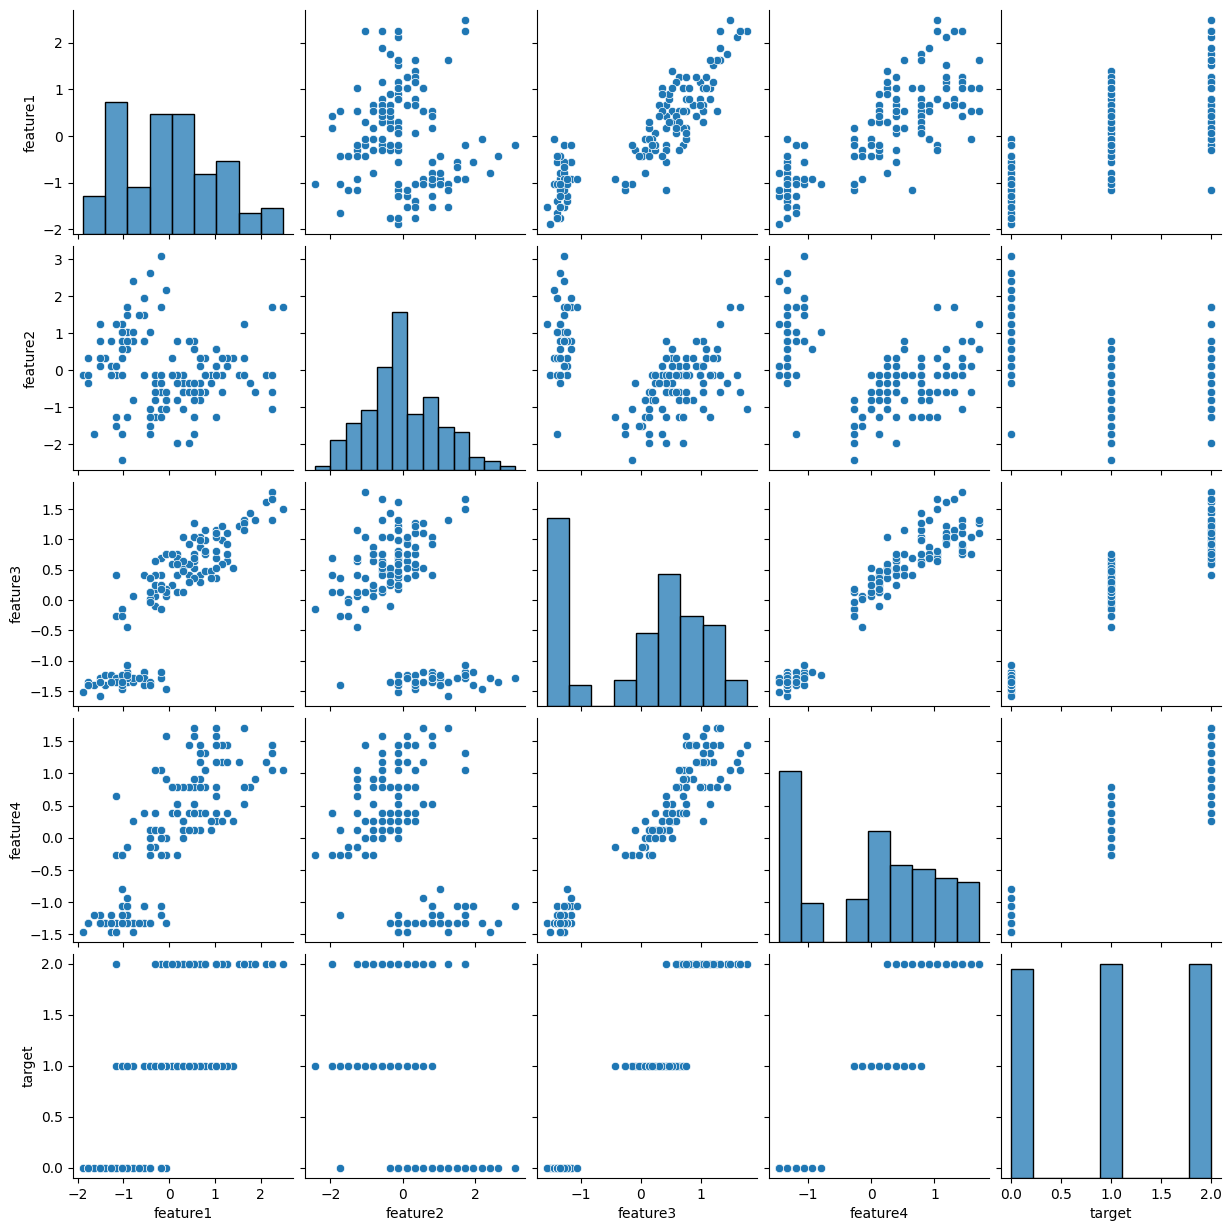

In [238]:
#Visualize the data distribution and relationships
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.show()

# Classification

In [239]:
#Split the dataset into training and testing sets
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)

In [240]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")


Logistic Regression


# confusion matrix

In [241]:
#Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


In [242]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Accuracy: 0.9


In [243]:
#Precision, Recall, F1 Score for multiclass
average_method = 'weighted' # or 'micro', 'macro', depending on your requirement
print("Precision:", precision_score(y_test, y_pred_lr, 
average=average_method))
print("Recall:", recall_score(y_test, y_pred_lr, 
average=average_method))
print("F1 Score:", f1_score(y_test, y_pred_lr, 
average=average_method))

Precision: 0.9214285714285714
Recall: 0.9
F1 Score: 0.896


          feature1  feature2  feature3  feature4    target
feature1  1.000000 -0.111710  0.870723  0.815909  0.780282
feature2 -0.111710  1.000000 -0.425330 -0.361668 -0.423189
feature3  0.870723 -0.425330  1.000000  0.962694  0.948681
feature4  0.815909 -0.361668  0.962694  1.000000  0.956014
target    0.780282 -0.423189  0.948681  0.956014  1.000000


<Axes: >

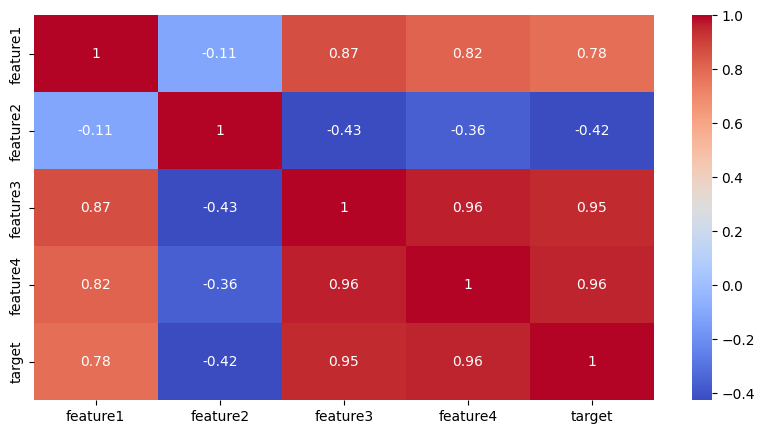

In [244]:
# Compute the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# plot the heat map
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap = 'coolwarm')

<Axes: >

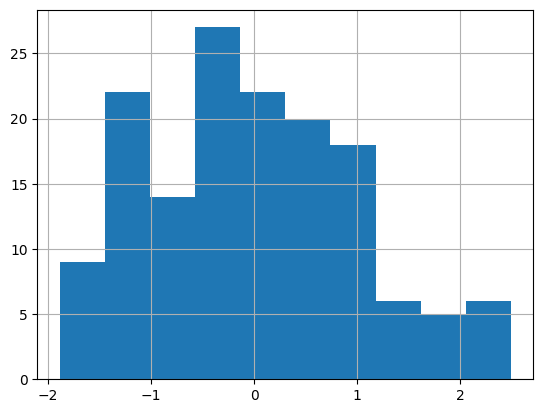

In [245]:
df['feature1'].hist()


<Axes: >

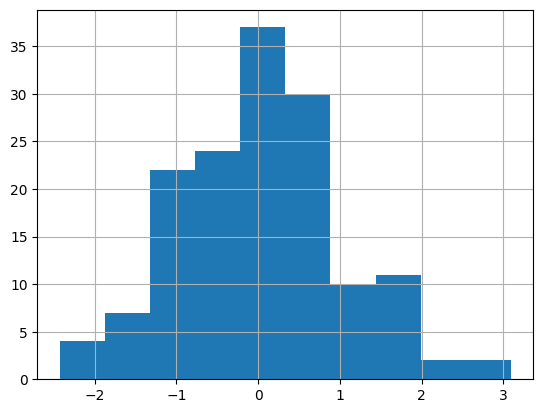

In [246]:
df['feature2'].hist()


<Axes: >

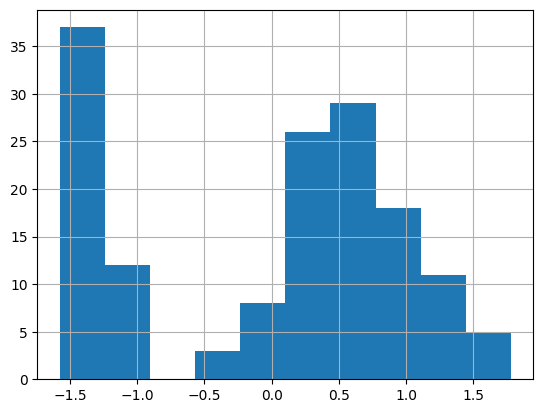

In [247]:
df['feature3'].hist()


<Axes: >

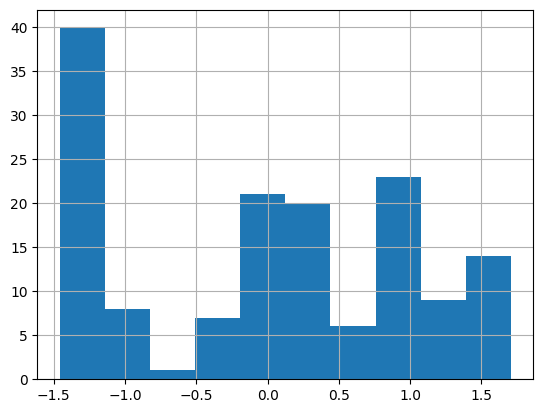

In [248]:
df['feature4'].hist()


# Regression

In [249]:
from sklearn.model_selection import train_test_split
## train - 70%
## test - 30%

# input data
X = df.drop(columns=['target'])
# output data
Y = df['target']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [250]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [251]:
# model training - fit() - used for training the model with the data
model.fit(x_train, y_train)


LogisticRegression()

In [252]:
# print metric to get performance - model.score() - gives the accuracy for the test data
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [253]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [254]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [255]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [227]:
import sklearn.datasets as datasets
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [256]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# REGRESSION

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)


print("\nLinear Regression:")
print("R-squared:", r2_lr)
print("Mean Squared Error:", mse_lr)


#Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("\nDecision Tree Regressor:")
print("R-squared:", r2_dtr)
print("Mean Squared Error:", mse_dtr)



Linear Regression:
R-squared: 0.9117723926566086
Mean Squared Error: 0.055768561678785654


ValueError: Found input variables with inconsistent numbers of samples: [45, 30]

# CROSS_VALIDATION

In [261]:
# Cross-Validation for Classification Models
from sklearn.model_selection import cross_val_score
print("\nCross-Validation Scores:")
print("Logistic Regression:", cross_val_score(lr, X, y, cv=5).mean(), "±", cross_val_score(lr, X, y, cv=5).std())
print("Decision Tree Classifier:", cross_val_score(dtr, X, y, cv=5).mean(), "±", cross_val_score(dtr, X, y, cv=5).std())
print("Random Forest Classifier:", cross_val_score(rf, X, y, cv=5).mean(), "±", cross_val_score(rf, X, y, cv=5).std())

# Cross-Validation for Regression Models
print("\nLinear Regression:", cross_val_score(lr, X, y, cv=5, scoring='r2').mean(), "±", cross_val_score(lr, X, y, cv=5, scoring='r2').std())
print("Decision Tree Regressor:", cross_val_score(dtr, X, y, cv=5, scoring='r2').mean(), "±", cross_val_score(dtr, X, y, cv=5, scoring='r2').std())



Cross-Validation Scores:
Logistic Regression: 0.32112971233814874 ± 0.3948011769951608
Decision Tree Classifier: 0.5077998025366446 ± 0.42663328635961273
Random Forest Classifier: 0.9666666666666668 ± 0.024944382578492935

Linear Regression: 0.32112971233814874 ± 0.3948011769951608
Decision Tree Regressor: 0.5077998025366446 ± 0.4531349884000021
